In [141]:
%matplotlib inline
import numpy as np
import random
import pandas as pd
import seaborn as sbn
sbn.set()
import matplotlib.pyplot as plt

#ts = [np.array([1,5,10]), np.array([1,3,11]), np.array([1,7,10]), np.array([1,2,3]), np.array([1,6,2]),np.array([1,1,1])]
#cls = [1,1,1,-1,-1,-1]
ts = [np.array([1,.2,.1]),np.array([1,.4,.6]),np.array([1,.5,.2]),np.array([1,.7,.9])]
cls = [1,1,1,-1]
#w = np.array([1,1,1])

1 [ 0.   0.3  0.1]


None

<function ipywidgets.widgets.interaction.interact.<locals>.<lambda>>

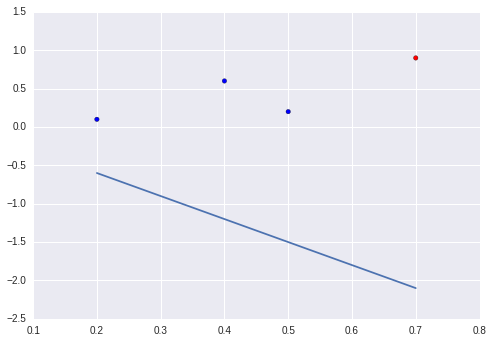

In [142]:
from ipywidgets import interact, interactive, fixed
from IPython.html import widgets


class Perceptron:
    def __init__(self,ts,tc):
        self.training_set = ts
        self.classes = tc
        self.weights = np.array([1 for i in range(len(ts[0]))])
    def classify(self,x):
        return np.sign(np.dot(x,self.weights))
    
    def learn(self, limit = 10000):
        done = False
        count = 0
        
        while not done and count < limit:
            count += 1
            self.correct = []
            self.incorrect = []
            #first classify all points
            for ix, i in enumerate(self.training_set):
                if (self.classify(i) == self.classes[ix]):
                    self.correct.append(ix)
                else:
                    self.incorrect.append(ix)
            if len(self.incorrect) == 0:
                print("Done!", self.weights)
                done = True
            else:
                p = random.randrange(len(self.incorrect))
                y = self.training_set[self.incorrect[p]]
                self.weights = self.weights + y*self.classes[self.incorrect[p]]
                print(len(self.incorrect),self.weights)
        self.plot()
    def plot(self):
        cols = []
        xvals = list(map(lambda x: x[1],self.training_set))
        cmap = list(map(lambda x: 'red' if x < 0 else 'blue', self.classes))
        plt.scatter(xvals, list(map(lambda x: x[2], self.training_set)), c = cmap)
        slope, intcpt = -self.weights[1]/self.weights[2], -self.weights[0]/self.weights[2]
        xvals = np.linspace(min(xvals), max(xvals))
        plt.plot(xvals, slope*xvals+intcpt)
p = Perceptron(ts,cls)
interact(p.learn, limit = widgets.widget_int.IntSlider(min = 0, max = 10, step = 1, value = 1))



In [143]:
iris_df = pd.read_csv('../CS420/CS420/iris.csv')
iris_df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


49 [-4.  -2.5 -0.6  0.4]
51 [ 2.3  0.8  5.4  2.9]
49 [-2.7 -2.2  3.8  2.7]
47 [ 2.9  0.5  8.   4. ]
49 [-2.8 -3.3  6.3  3.7]
Done! [-2.8 -3.3  6.3  3.7]


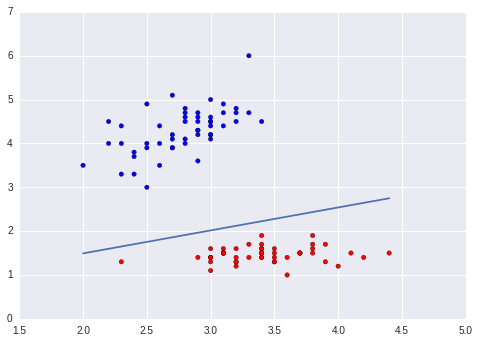

In [144]:
#setosa and versicolor
iris_setosa_versi= iris_df.iloc[0:100,[0,1,2,3]].values
#iris_setosa_versi
setosa_versi_spe = iris_df.iloc[0:100,4].values
setosa_versi_spe = np.where(setosa_versi_spe == 'Iris-setosa', -1, 1) #red == setosa and blue is versicolor
#print(setosa_versi_spe)
P1 = Perceptron(iris_setosa_versi, setosa_versi_spe)
P1.learn()


48 [-4.6 -2.  -3.1 -0.3]
50 [ 2.2  1.2  2.8  2. ]
48 [-3.4 -1.5 -1.4  0.7]
50 [ 3.1  1.5  4.1  2.5]
48 [-3.3 -1.4 -0.2  1.2]
50 [ 3.1  1.3  5.1  3.1]
48 [-2.4 -1.2  1.1  1.8]
50 [ 5.2  1.8  7.7  3.9]
48 [-0.3 -0.7  3.7  2.6]
48 [-6.2 -3.7 -0.5  1.1]
50 [ 1.5 -1.1  6.4  3.4]
48 [-5.2 -4.1  1.4  1.7]
50 [ 2.  -0.9  7.4  3.5]
48 [-3.7 -3.8  3.2  2.2]
50 [ 1.2 -1.3  7.7  3.9]
48 [-4.6 -3.9  3.7  2.7]
50 [ 2.6 -0.9  9.5  4.3]
48 [-2.8 -3.9  5.   2.8]
4 [-8.8 -6.6 -0.1  1.2]
50 [-2.5 -3.8  5.   2.7]
21 [-8.5 -6.7  0.5  1.2]
50 [-1.3 -3.7  6.3  2.8]
48 [-7.  -6.5  1.8  1.5]
50 [ 0.9 -2.7  8.2  3.5]
48 [-5.3 -5.6  3.9  2.2]
50 [  1.9  -2.   10.    4.7]
48 [-3.8 -4.8  5.5  3.4]
40 [  2.3  -1.8  10.4   5.2]
48 [-4.3 -4.7  5.8  3.9]
42 [  2.   -2.   10.7   5.7]
48 [-4.2 -4.2  6.2  4.2]
9 [  3.   -1.2  12.    5.8]
48 [-3.  -3.4  8.   4.8]
48 [-8.8 -6.   4.   3.6]
50 [-2.4 -2.8  9.3  5.9]
48 [-9.1 -5.8  4.3  4.2]
50 [ -2.4  -3.3  10.1   6. ]
48 [-7.9 -5.8  6.1  4.7]
50 [ -1.6  -2.9  11.7   6.5]
48 

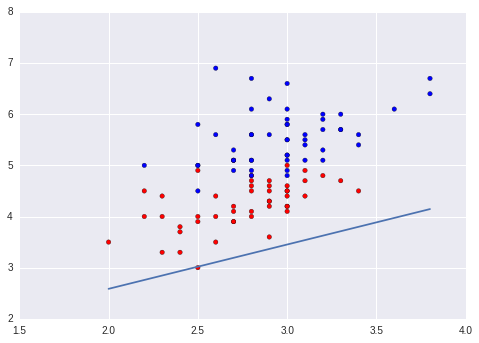

In [145]:
#versicolor and virginica
iris_versi_virgi= iris_df.iloc[51:150,[0,1,2,3]].values
#iris_versi_virgi
versi_virgi_spe = iris_df.iloc[51:150,4].values
versi_virgi_spe = np.where(versi_virgi_spe == 'Iris-versicolor',-1, 1) #red == versicolor and blue is virgi
#print(versi_virgi_spe)
P2 = Perceptron(iris_versi_virgi,versi_virgi_spe)
P2.learn()

In [146]:
traindata = iris_df.sample(120)
#traincats = iris_df.iloc[traindata.index,4]
#print(traindata)
testdata = iris_df.drop(traindata.index)
#print(type(traindata))
#print(type(testdata))


43 [-4.1 -2.3 -0.7  0.5]
77 [ 2.7  0.5  4.1  1.9]
43 [-2.5 -3.6  2.6  1.8]
77 [ 4.2 -0.3  8.3  4.3]
43 [-0.9 -3.8  6.9  4. ]
Done! [-0.9 -3.8  6.9  4. ]


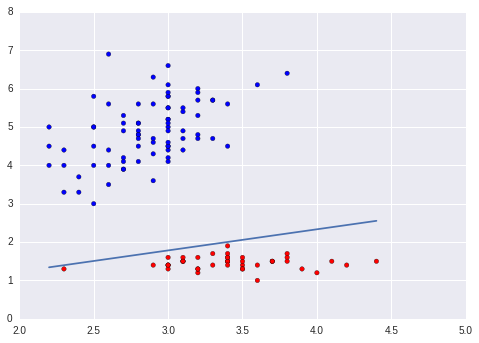

In [147]:
#setosa and versicolor
iris_subset= traindata.iloc[0:120,[0,1,2,3]].values
#print(iris_subset)
iris_subset_spe = traindata.iloc[0:120,4].values
iris_subset_spe = np.where(iris_subset_spe == 'Iris-setosa', -1, 1) #red == setosa and blue is versicolor
#print(iris_subset_spe)
P1 = Perceptron(iris_subset, iris_subset_spe)
P1.learn()

39 [-4.7 -1.8 -3.1 -0.3]
81 [ 0.7  1.6 -1.4 -0.1]
40 [-4.9 -1.3 -5.  -1.4]
81 [ 0.1  2.2 -3.4 -0.8]
38 [ 6.6  5.2  2.1  1. ]
39 [ 1.   2.5 -2.1 -0.3]
40 [-6.  -0.7 -6.8 -1.7]
81 [ 0.5  2.3 -1.6  0.3]
40 [-5.   0.  -5.6 -1. ]
81 [-0.1  3.1 -4.1 -0.9]
38 [ 7.6  6.1  2.   1.4]
39 [ 0.7  3.  -2.9 -0.1]
58 [ 7.9  6.6  3.2  2.4]
39 [ 2.3  3.7 -0.4  1.1]
39 [-3.7  0.3 -4.9 -0.5]
81 [ 3.9  3.3  1.7  1.6]
39 [-2.   0.1 -3.1 -0.2]
81 [ 2.8  3.1 -1.7 -0.1]
39 [-3.5  0.8 -6.1 -1.4]
81 [ 2.8  3.3 -1.1  0.5]
39 [-2.8  0.3 -5.2 -0.8]
81 [ 1.7  2.6 -3.9 -0.5]
58 [-4.  -0.2 -8.  -1.8]
81 [ 2.5  2.8 -2.8  0.2]
39 [-3.3  0.1 -6.9 -0.8]
81 [ 1.8  3.9 -5.4 -0.5]
41 [ 8.5  6.9 -0.2  1.8]
39 [ 2.5  4.7 -4.2  0.8]
39 [-4.1  1.7 -8.6 -0.6]
81 [ 3.   4.7 -2.7  1.5]
39 [-2.8  2.1 -6.7  0.3]
81 [ 2.   5.5 -5.1  0.5]
45 [-3.8  2.8 -9.2 -0.5]
81 [ 2.3  5.4 -3.6  0.9]
39 [-3.7  2.7 -8.7 -0.7]
81 [ 1.8  6.9 -7.3 -0.5]
46 [  8.5  10.2  -1.6   1.6]
39 [ 2.4  7.4 -6.3  0.4]
44 [ -4.6   4.2 -11.   -1. ]
81 [ 0.2  7.2 -9.

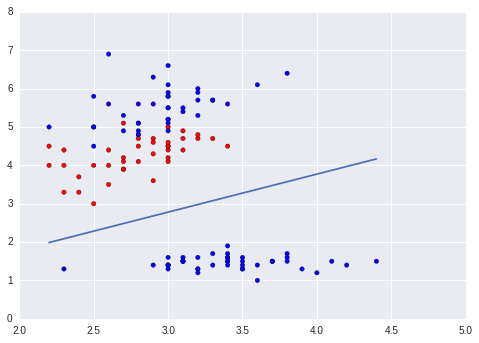

In [148]:
#setosa and versicolor
iris_subset= traindata.iloc[0:120,[0,1,2,3]].values
#iris_setosa_versi
iris_subset_spe = traindata.iloc[0:120,4].values
iris_subset_spe = np.where(iris_subset_spe == 'Iris-versicolor', -1, 1) #red == versicolor and blue is virginica
#print(setosa_versi_spe)
P2 = Perceptron(iris_subset, iris_subset_spe)
P2.learn()

In [149]:
def classify2(val):
    if (P1.classify(val) == -1):
        return "Iris-setosa"
    elif (P2.classify == -1):
        return "Iris-versicolor"
    else:
        return "Iris-virginica"

In [150]:

#print(type(testdata))
incorrect = 0
correct = 0
for idx, row_val in testdata.iterrows():
    c = classify2(row_val.values[0:4])
    if(c == row_val.values[4]):
        correct += 1
    else:
        incorrect += 1
print("Correct: ", correct)
print("Incorrect: ",incorrect)

Correct:  18
Incorrect:  11
